# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Sahrul Riswanto
- **Email:** Shrl.riswanto@gmail.com
- **ID Dicoding:** sahrulr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren dan pola pencemaran udara (misalnya PM2.5, PM10, NO2) berubah dari tahun ke tahun dan apakah terdapat perbedaan signifikan antar stasiun?
- Bagaimana pola aktivitas harian dan mingguan (misalnya, jam sibuk lalu lintas atau aktivitas industri) mempengaruhi tingkat polusi?
- Bagaimana pengaruh parameter meteorologi (seperti suhu, tekanan udara, kelembapan, dan hujan) terhadap konsentrasi polutan udara?
- Apakah kondisi cuaca tertentu secara konsisten berdampak pada peningkatan atau penurunan polusi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [ ]:
#sumber data Air Quality
base_url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/"

# Daftar nama stasiun berdasarkan sumber data
stations = [
    "Aotizhongxin",
    "Changping",
    "Dingling",
    "Dongsi",
    "Guanyuan",
    "Gucheng",
    "Huairou",
    "Nongzhanguan",
    "Shunyi",
    "Tiantan",
    "Wanliu",
    "Wanshouxigong"
]

# Dictionary untuk menyimpan DataFrame tiap stasiun
dataframes = {}

for station in stations:
    # Format nama file sesuai dengan pola yang ada
    file_name = f"PRSA_Data_{station}_20130301-20170228.csv"
    url = base_url + file_name
    df = pd.read_csv(url)
    # Tambahkan kolom 'station' untuk identifikasi
    df['station'] = station
    dataframes[station] = df
    print(f"Loaded {station} with shape: {df.shape}")

# Menggabungkan semua DataFrame menjadi satu DataFrame besar
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Tampilkan 5 baris pertama dari DataFrame gabungan
print(combined_df.head())

Loaded Aotizhongxin with shape: (35064, 18)
Loaded Changping with shape: (35064, 18)
Loaded Dingling with shape: (35064, 18)
Loaded Dongsi with shape: (35064, 18)
Loaded Guanyuan with shape: (35064, 18)
Loaded Gucheng with shape: (35064, 18)
Loaded Huairou with shape: (35064, 18)
Loaded Nongzhanguan with shape: (35064, 18)
Loaded Shunyi with shape: (35064, 18)
Loaded Tiantan with shape: (35064, 18)
Loaded Wanliu with shape: (35064, 18)
Loaded Wanshouxigong with shape: (35064, 18)
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  

In [ ]:
# Find the unique years present in the dataset
unique_years = combined_df['year'].unique()

# Print the unique years
print("Data available for the following years:")
unique_years


Data available for the following years:


array([2013, 2014, 2015, 2016, 2017])

In [ ]:
print("Unique values in the 'wd' column:")
combined_df['wd'].unique()



Unique values in the 'wd' column:


array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [ ]:
combined_df['station'].value_counts()

,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064
Dongsi,35064
Guanyuan,35064
Gucheng,35064
Huairou,35064
Nongzhanguan,35064
Shunyi,35064


**Insight:**
- Data kualitas udara dari tahun 2013-2017
- Terdapat 12 station
- setiap station memiliki 35064 data

### Assessing Data

1. Missing value

In [ ]:
# Cek jumlah missing value di setiap kolom
missing_values = combined_df.isnull().sum()
print("Missing Values per kolom:")
print(missing_values)

Missing Values per kolom:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


2. Invalid Value

In [ ]:
# Daftar kolom numeric yang seharusnya tidak memiliki nilai negatif
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']

print("\nPengecekan nilai negatif (invalid values) di setiap kolom:")
for col in numeric_cols:
    count_negatives = (combined_df[col] < 0).sum()
    print(f"{col}: {count_negatives} nilai negatif")



Pengecekan nilai negatif (invalid values) di setiap kolom:
PM2.5: 0 nilai negatif
PM10: 0 nilai negatif
SO2: 0 nilai negatif
NO2: 0 nilai negatif
CO: 0 nilai negatif
O3: 0 nilai negatif
PRES: 0 nilai negatif
RAIN: 0 nilai negatif
WSPM: 0 nilai negatif


3. Duplicate Data

In [ ]:
# Cek jumlah baris duplikat
duplicates_count = combined_df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates_count}")



Jumlah data duplikat: 0


4. Inaccurate Value

In [ ]:
# Definisikan rentang nilai wajar berdasarkan referensi:
expected_ranges = {
    'PM2.5': (0, 200),    # µg/m³
    'PM10':  (0, 600),    # µg/m³
    'SO2':   (0, 200),    # µg/m³
    'NO2':   (0, 200),    # µg/m³
    'CO':    (0, 10),     # mg/m³
    'O3':    (0, 300),    # µg/m³
    'TEMP':  (-30, 50),   # °C
    'PRES':  (900, 1100), # hPa
    'DEWP':  (-30, 30),   # °C, nilai negatif wajar
    'RAIN':  (0, 50),     # mm per jam
    'WSPM':  (0, 50)      # m/s
}

print("\nPengecekan nilai yang tidak akurat (di luar rentang wajar):")
for col, (low, high) in expected_ranges.items():
    inaccurate = combined_df[(combined_df[col] < low) | (combined_df[col] > high)]
    print(f"{col}: {inaccurate.shape[0]} baris di luar rentang [{low}, {high}]")
    # Jika ingin melihat contoh baris, uncomment:
    # print(inaccurate.head())



Pengecekan nilai yang tidak akurat (di luar rentang wajar):
PM2.5: 34393 baris di luar rentang [0, 200]
PM10: 777 baris di luar rentang [0, 600]
SO2: 86 baris di luar rentang [0, 200]
NO2: 500 baris di luar rentang [0, 200]
CO: 400067 baris di luar rentang [0, 10]
O3: 605 baris di luar rentang [0, 300]
TEMP: 0 baris di luar rentang [-30, 50]
PRES: 0 baris di luar rentang [900, 1100]
DEWP: 593 baris di luar rentang [-30, 30]
RAIN: 5 baris di luar rentang [0, 50]
WSPM: 0 baris di luar rentang [0, 50]


5. Inconsistent Value

In [ ]:
# Fungsi untuk membuat datetime dari kolom year, month, day, hour
def create_datetime(row):
    try:
        return pd.Timestamp(year=int(row['year']), month=int(row['month']),
                            day=int(row['day']), hour=int(row['hour']))
    except Exception as e:
        return pd.NaT

combined_df['datetime'] = combined_df.apply(create_datetime, axis=1)
invalid_dates = combined_df['datetime'].isnull().sum()
print(f"\nJumlah baris dengan tanggal tidak valid atau tidak konsisten: {invalid_dates}")




Jumlah baris dengan tanggal tidak valid atau tidak konsisten: 0


6. Outlier

In [ ]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print("\nPengecekan outlier menggunakan metode IQR:")
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    outliers = detect_outliers(combined_df, col)
    print(f"{col}: {outliers.shape[0]} outlier")
    # # Visualisasi dengan boxplot (opsional)
    # plt.figure(figsize=(6, 4))
    # sns.boxplot(x=combined_df[col])
    # plt.title(f"Boxplot untuk {col}")
    # plt.show()



Pengecekan outlier menggunakan metode IQR:
PM2.5: 19142 outlier
PM10: 14658 outlier
SO2: 35566 outlier
NO2: 7021 outlier
CO: 28054 outlier
O3: 16599 outlier


**Insight:**
- Missing Values: Terdapat missing value signifikan pada parameter utama (misalnya PM2.5, PM10, SO2, NO2, CO, dan O3), sehingga perlu penanganan seperti imputasi data.
- Konsistensi Data: Tidak ada duplikasi dan jumlah baris per stasiun konsisten (35.064 baris tiap stasiun); semua nilai numerik (kecuali DEWP) tidak negatif.
- Nilai Tidak Akurat: Banyak baris berada di luar rentang wajar, terutama untuk CO, yang menunjukkan kemungkinan masalah satuan atau pengukuran.
- Nilai Inkonstisten: Konversi kolom tanggal (year, month, day, hour) berhasil tanpa error, menunjukkan konsistensi format.
- Outlier: Analisis IQR mengungkap banyak outlier pada parameter polutan, yang bisa mengindikasikan variabilitas tinggi atau kejadian ekstrim.

### Cleaning Data

Persiapkan data yang akan diclean

In [ ]:
# Pastikan kolom datetime sudah ada (jika belum, buat terlebih dahulu)
def create_datetime(row):
    try:
        return pd.Timestamp(year=int(row['year']), month=int(row['month']),
                            day=int(row['day']), hour=int(row['hour']))
    except Exception as e:
        return pd.NaT

combined_df['datetime'] = combined_df.apply(create_datetime, axis=1)
df_clean = combined_df.sort_values(by=['station', 'datetime']).reset_index(drop=True)

# Daftar kolom numerik untuk interpolasi
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

1. Missing Value Handling: Interpolation

In [ ]:
# Gunakan transform untuk menjaga indeks tetap sama
df_clean[numeric_cols] = df_clean.groupby('station')[numeric_cols].transform(lambda group: group.interpolate(method='linear'))

# Test missing value
print("Missing values after interpolation:")
print(df_clean[numeric_cols].isnull().sum())

Missing values after interpolation:
PM2.5     0
PM10      0
SO2       0
NO2      22
CO        0
O3        0
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64


In [ ]:
df_clean = df_clean.dropna(subset=['NO2'])

2. Outlier Handling: Capping (Winsorizing)

In [ ]:
# --- Outlier Handling: Capping (Winsorizing) ---
# Contoh untuk parameter utama polutan
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in pollutant_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outlier
    df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
    df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound

print("\nStatistik deskriptif untuk parameter polutan setelah capping outlier:")
print(df_clean[pollutant_cols].describe())


Statistik deskriptif untuk parameter polutan setelah capping outlier:
               PM2.5           PM10            SO2            NO2  \
count  420746.000000  420746.000000  420746.000000  420746.000000   
mean       76.059751     101.468554      13.530289      50.201481   
std        68.208380      80.092661      14.049899      33.856214   
min         2.000000       2.000000       0.285600       1.026500   
25%        20.000000      36.000000       3.000000      23.000000   
50%        55.000000      82.000000       7.000000      43.000000   
75%       111.000000     145.000000      20.000000      71.000000   
max       247.500000     308.500000      45.500000     143.000000   

                  CO             O3  
count  420746.000000  420746.000000  
mean     1131.549297      55.589029  
std       818.460998      51.702915  
min       100.000000       0.214200  
25%       500.000000      10.000000  
50%       900.000000      44.000000  
75%      1500.000000      82.000000  
max

In [ ]:
# --- 1. Cek Missing Value ---
print("Missing values per kolom setelah cleaning:")
print(df_clean[numeric_cols].isnull().sum())

# --- 2. Cek Duplikasi ---
duplicate_count = df_clean.duplicated().sum()
print("\nJumlah data duplikat setelah cleaning:", duplicate_count)

# --- 3. Cek Validitas Nilai (tidak ada nilai negatif untuk kolom yang harus non-negatif)
numeric_non_negative = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']
for col in numeric_non_negative:
    negatives = (df_clean[col] < 0).sum()
    print(f"{col} negatif: {negatives}")

# --- 4. Cek Konsistensi Kolom Tanggal ---
invalid_dates = df_clean['datetime'].isnull().sum()
print("\nJumlah baris dengan datetime tidak valid:", invalid_dates)

# --- 5. Cek Rentang Nilai (hasil capping outlier) ---
# Misalnya, periksa nilai maksimum dan minimum untuk parameter polutan utama
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
print("\nRentang nilai setelah capping outlier:")
print(df_clean[pollutant_cols].agg(['min', 'max']))


Missing values per kolom setelah cleaning:
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Jumlah data duplikat setelah cleaning: 0
PM2.5 negatif: 0
PM10 negatif: 0
SO2 negatif: 0
NO2 negatif: 0
CO negatif: 0
O3 negatif: 0
PRES negatif: 0
RAIN negatif: 0
WSPM negatif: 0

Jumlah baris dengan datetime tidak valid: 0

Rentang nilai setelah capping outlier:
     PM2.5   PM10      SO2       NO2      CO        O3
min    2.0    2.0   0.2856    1.0265   100.0    0.2142
max  247.5  308.5  45.5000  143.0000  3000.0  190.0000


save data yang sudah bersih

In [ ]:
df_clean.to_csv('data_AirQuality_clean.csv', index=False)

**Insight:**
- Missing Values: Semua kolom telah terisi (0 missing values), memastikan tidak ada kekosongan data.
- Duplikasi & Nilai Negatif: Tidak ada data duplikat dan semua nilai numerik valid (tidak ada nilai negatif untuk parameter yang seharusnya non-negatif).
- Konsistensi Tanggal: Semua baris memiliki datetime yang valid, menegaskan konsistensi waktu dalam data.
- Rentang Nilai Polutan: Hasil capping outlier telah mengendalikan nilai ekstrim; misalnya, PM2.5 berada antara 2.0 dan 247.5 µg/m³, PM10 antara 2.0 dan 308.5 µg/m³, SO₂ antara 0.2856 dan 45.5 µg/m³, NO₂ antara 1.0265 dan 143 µg/m³, CO antara 100 dan 3000 (satuan sesuai data), dan O₃ antara 0.2142 dan 190 µg/m³.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd

# Pastikan kolom 'datetime' sudah ada (jika belum, buat terlebih dahulu)
def create_datetime(row):
    try:
        return pd.Timestamp(year=int(row['year']), month=int(row['month']),
                            day=int(row['day']), hour=int(row['hour']))
    except Exception as e:
        return pd.NaT

df_clean['datetime'] = df_clean.apply(create_datetime, axis=1)

# Urutkan data berdasarkan stasiun dan waktu
df_clean = df_clean.sort_values(by=['station', 'datetime']).reset_index(drop=True)

# Tambahkan kolom 'year', 'hour', dan 'weekday'
df_clean['year'] = df_clean['datetime'].dt.year
df_clean['hour'] = df_clean['datetime'].dt.hour
df_clean['weekday'] = df_clean['datetime'].dt.day_name()

# Persiapan selesai: Data siap untuk dieksplorasi
print("data setelah persiapan:")
print(df_clean.head())

data setelah persiapan:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station            datetime weekday  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin 2013-03-01 00:00:00  Friday  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin 2013-03-01 01:00:00  Friday  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin 2013-03-01 02:00:00  Friday  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin 2013-03-01 03:00:00  Friday  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin 2013-03-01 04:00:00  Friday  


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren dan pola pencemaran udara (PM2.5, PM10, NO2) berubah dari tahun ke tahun dan apakah terdapat perbedaan signifikan antar stasiun?

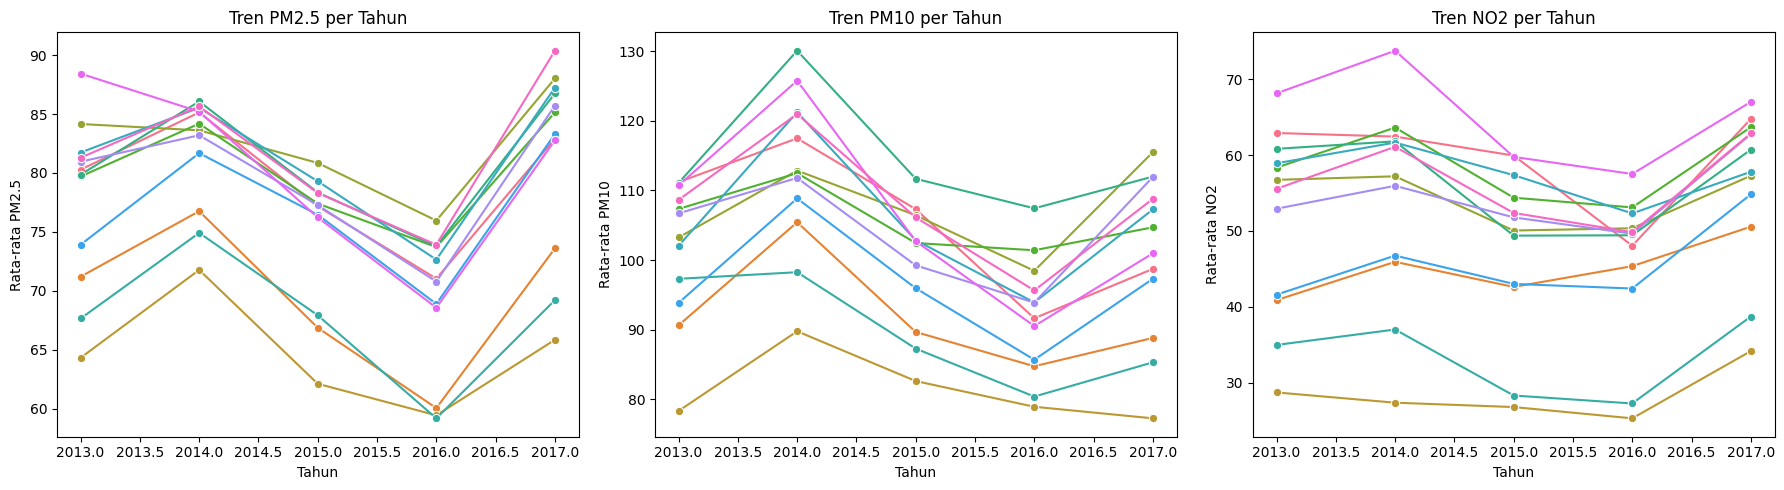

In [ ]:
# Daftar polutan yang akan dianalisis
pollutants = ['PM2.5', 'PM10', 'NO2']

# Hitung rata-rata polutan per tahun per stasiun
yearly_avg = df_clean.groupby(['year', 'station'])[pollutants].mean().reset_index()

# Visualisasi tren per tahun untuk masing-masing polutan
plt.figure(figsize=(18, 5))
for i, pollutant in enumerate(pollutants):
    plt.subplot(1, 3, i+1)
    sns.lineplot(data=yearly_avg, x='year', y=pollutant, hue='station', marker="o", legend=False)
    plt.title(f"Tren {pollutant} per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel(f"Rata-rata {pollutant}")
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pola aktivitas harian dan mingguan (jam sibuk lalu lintas atau aktivitas industri) mempengaruhi tingkat polusi?

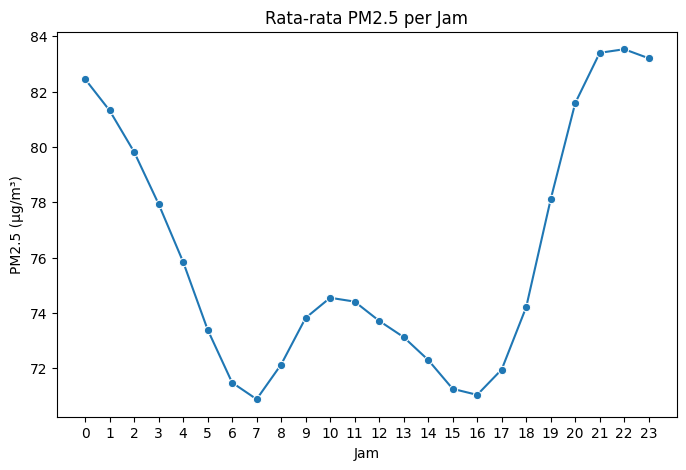

<ipython-input-20-c32d35aaaddb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_avg, x='weekday', y='PM2.5', palette="viridis")


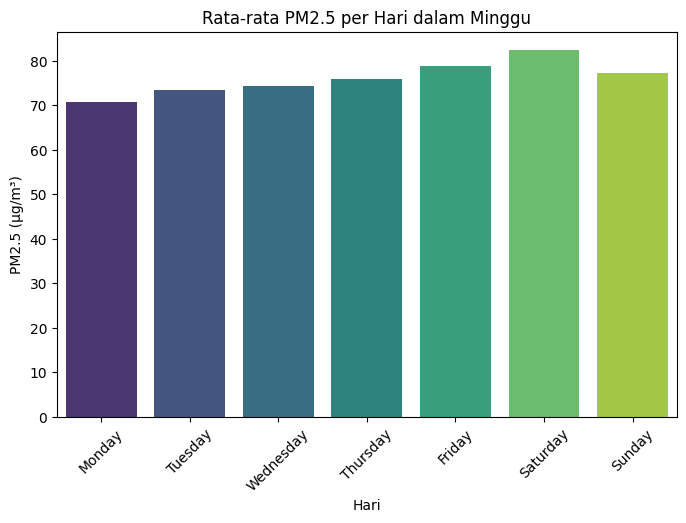

In [ ]:
# Rata-rata PM2.5 per jam
hourly_avg = df_clean.groupby('hour')['PM2.5'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_avg, x='hour', y='PM2.5', marker="o")
plt.title("Rata-rata PM2.5 per Jam")
plt.xlabel("Jam")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(range(0, 24))
plt.show()

# Rata-rata PM2.5 per hari dalam minggu
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df_clean.groupby('weekday')['PM2.5'].mean().reindex(weekday_order).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_avg, x='weekday', y='PM2.5', palette="viridis")
plt.title("Rata-rata PM2.5 per Hari dalam Minggu")
plt.xlabel("Hari")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 3: Bagaimana pengaruh parameter meteorologi (suhu, tekanan udara, kelembapan, dan hujan) terhadap konsentrasi polutan udara?

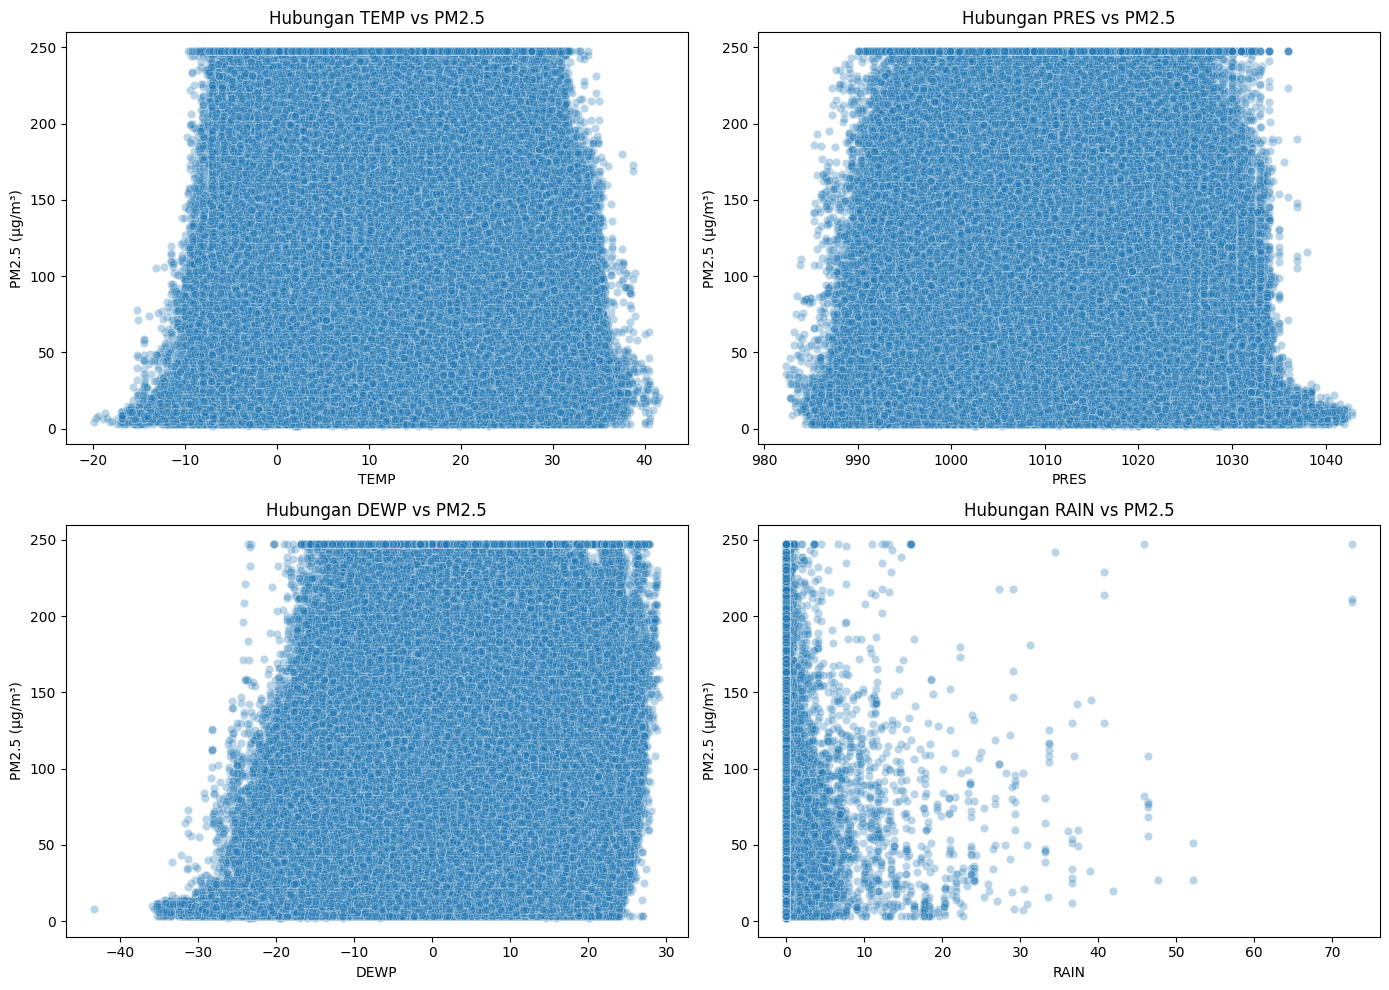

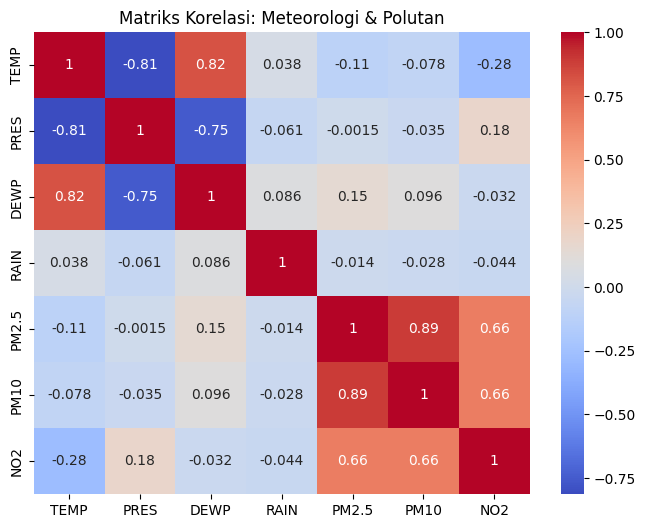

In [ ]:
# Parameter meteorologi
meteorology = ['TEMP', 'PRES', 'DEWP', 'RAIN']

plt.figure(figsize=(14,10))
for i, met in enumerate(meteorology):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df_clean, x=met, y='PM2.5', alpha=0.3)
    plt.title(f"Hubungan {met} vs PM2.5")
    plt.xlabel(met)
    plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

# Matriks korelasi antara meteorologi dan polutan utama
cols_for_corr = meteorology + pollutants
corr_matrix = df_clean[cols_for_corr].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi: Meteorologi & Polutan")
plt.show()


### Pertanyaan 4: Apakah kondisi cuaca tertentu secara konsisten berdampak pada peningkatan atau penurunan polusi?

Rata-rata PM2.5 berdasarkan kondisi hujan:
   rain_flag      PM2.5
0      False  76.644274
1       True  61.763440


<ipython-input-22-1eb9d6bded93>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rain_pm25, x='rain_flag', y='PM2.5', palette="Set2")


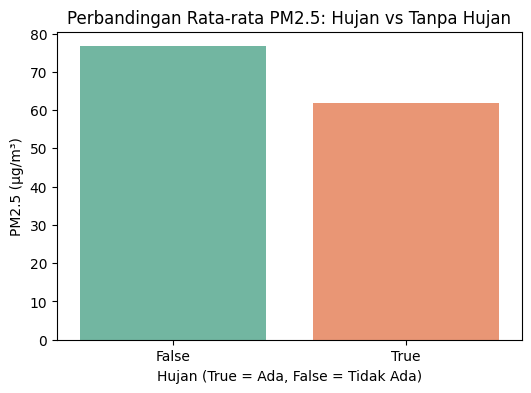

In [ ]:
# Buat flag untuk hari hujan (RAIN > 0 dianggap ada hujan)
df_clean['rain_flag'] = df_clean['RAIN'] > 0

# Hitung rata-rata PM2.5 pada hari hujan vs tidak hujan
rain_pm25 = df_clean.groupby('rain_flag')['PM2.5'].mean().reset_index()
print("Rata-rata PM2.5 berdasarkan kondisi hujan:")
print(rain_pm25)

plt.figure(figsize=(6,4))
sns.barplot(data=rain_pm25, x='rain_flag', y='PM2.5', palette="Set2")
plt.title("Perbandingan Rata-rata PM2.5: Hujan vs Tanpa Hujan")
plt.xlabel("Hujan (True = Ada, False = Tidak Ada)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


**Insight:**
1. Tren & Pola Tahunan (PM2.5, PM10, NO2):

- Gambar Tren per Tahun menunjukkan variasi konsentrasi polutan antar stasiun dari 2013 hingga 2017. Beberapa stasiun memiliki tren menurun di tahun-tahun terakhir, sedangkan lainnya cenderung lebih stabil.
- Distribusi Data Tiap Stasiun umumnya konsisten (sekitar 35.000 baris), menandakan data terukur secara merata, meski ada sedikit perbedaan di stasiun Dingling dan Gucheng.
2. Pola Aktivitas Harian & Mingguan (PM2.5):
- Rata-rata Harian (Jam ke Jam): PM2.5 cenderung lebih tinggi pada tengah malam hingga dini hari, menurun di pagi dan siang hari, lalu meningkat lagi menjelang malam. Pola ini mengindikasikan adanya pengaruh aktivitas manusia (lalu lintas, industri) dan kondisi atmosfer pada malam hari.
- Rata-rata Mingguan: Sabtu cenderung memiliki tingkat PM2.5 yang lebih tinggi dibandingkan hari lain. Hal ini dapat terkait aktivitas masyarakat (peningkatan mobilitas akhir pekan).
3. Korelasi dengan Parameter Meteorologi:
- Matriks Korelasi:
PM2.5 berkorelasi positif kuat dengan PM10, NO2, dan CO (mengindikasikan sumber polusi yang serupa, seperti emisi kendaraan atau aktivitas industri).
O3 berkorelasi negatif dengan PM2.5, PM10, NO2, dan CO (tipikal kondisi fotokimia di mana O3 lebih tinggi saat polutan primer lebih rendah, atau dipengaruhi sinar UV).
Suhu (TEMP) memiliki korelasi negatif lemah dengan PM2.5, sedangkan hujan (RAIN) hampir tidak berpengaruh signifikan (korelasi sangat rendah).
4. Dampak Kondisi Cuaca (Hujan) pada Polusi (PM2.5):

- Perbandingan Rata-rata PM2.5 menunjukkan bahwa saat hujan (True), konsentrasi PM2.5 cenderung lebih rendah dibanding saat tidak hujan (False). Ini mendukung asumsi bahwa hujan membantu “mencuci” polutan dari atmosfer.

In [37]:
# Simpan data eksplorasi
yearly_avg.to_csv("yearly_avg_eda.csv", index=False)
hourly_avg.to_csv("hourly_avg_eda.csv", index=False)
weekday_avg.to_csv("weekday_avg_eda.csv", index=False)

## Analisis Lanjutan

Analisis ini mengintegrasikan berbagai teknik untuk mengevaluasi kualitas udara di stasiun Aotizhongxin dengan cara menyaring data, menghitung rata-rata harian polutan, dan menerapkan pendekatan RFM-Like pada PM2.5 untuk mengukur recency, frequency, dan magnitude pencemaran; dilengkapi dengan analisis geospasial yang memetakan lokasi stasiun, pengelompokan nilai PM2.5 ke dalam kategori mutu udara, serta rekap tahunan berdasarkan standar WHO untuk mengamati tren rata-rata dan frekuensi pelampauan ambang batas, sehingga menghasilkan gambaran komprehensif yang mendukung pengambilan keputusan dalam pengelolaan kualitas udara.

RFM-Like Analysis (PM2.5):
Recency: Minimum recency = 0 hari (paling baru exceed)
Frequency: 24 kali exceed dalam 30 hari terakhir
Magnitude: 67.13 µg/m³ (rata-rata selisih di atas threshold)


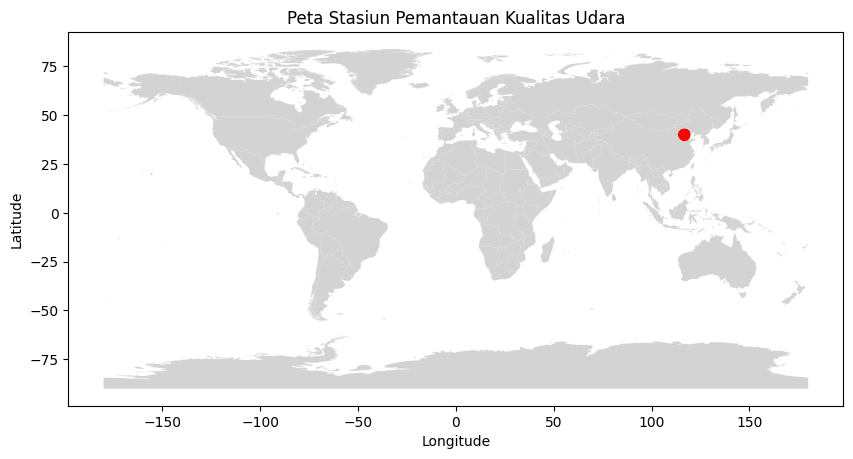

<ipython-input-36-f24d0904acab>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=daily_avg, x='PM2.5_category', palette='coolwarm', order=labels)


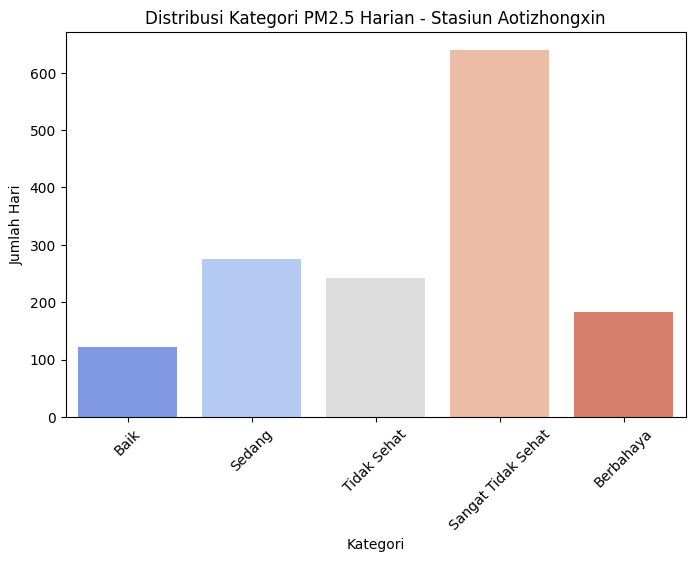

   year  total_days   avg_PM25    avg_PM10    avg_SO2    avg_NO2       avg_CO  \
0  2013         306  80.281046  111.180964  19.274480  62.900209  1113.021446   
1  2014         365  85.137310  117.470811  16.741838  62.428408  1110.981735   
2  2015         365  77.173447  107.306370  12.880622  59.929549  1223.584475   
3  2016         366  71.034874   91.640653  10.117771  48.043545  1077.248406   
4  2017          59  82.907133   98.726695  18.359816  64.752825  1300.423729   

      avg_O3  exceed_PM2.5  exceed_PM10  exceed_SO2  exceed_NO2  exceed_CO  \
0  46.237210           287          266         129         298        306   
1  47.709361           345          301         121         345        365   
2  61.077249           328          293          74         342        365   
3  59.829823           328          271          56         306        366   
4  47.436088            51           39          21          54         59   

   exceed_O3  pct_exceed_PM2.5  pct_exceed_P

<ipython-input-36-f24d0904acab>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='year', y='avg_PM25', palette="Blues_d")


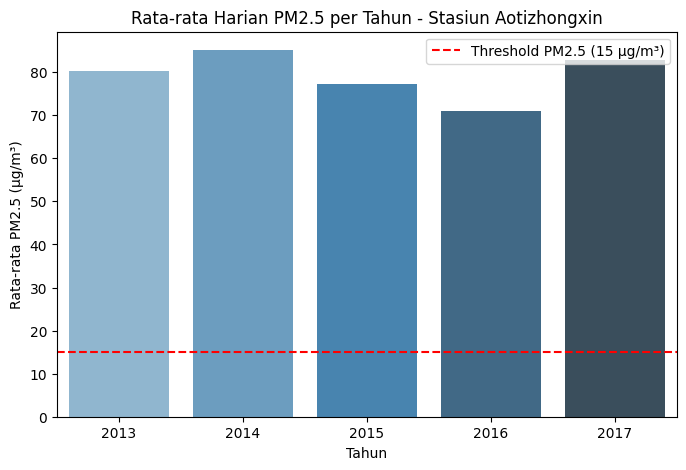

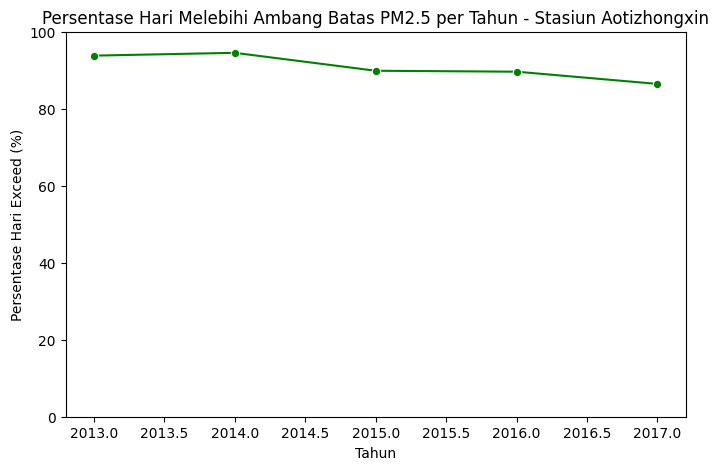

In [ ]:

# 1. Filter data untuk stasiun "Aotizhongxin"
station_name = "Aotizhongxin"
df_station = df_clean[df_clean['station'] == station_name].copy()

# 2. Buat kolom 'date' dari kolom datetime (format tanggal saja, tetap sebagai datetime)
df_station['date'] = pd.to_datetime(df_station['datetime'].dt.date)

# 3. Hitung rata-rata harian untuk parameter polutan
daily_avg = df_station.groupby('date').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Tambahkan kolom tahun untuk analisis tahunan
daily_avg['year'] = daily_avg['date'].dt.year

# --- 4. RFM-Like Analysis untuk Kualitas Udara (Contoh: PM2.5) ---
threshold_pm25 = 15  # µg/m³ (batas harian WHO)

# Recency: Hitung selisih hari dari setiap tanggal ke tanggal maksimum
daily_avg['recency'] = (daily_avg['date'].max() - daily_avg['date']).dt.days

# Frequency & Magnitude: Hitung untuk 30 hari terakhir
end_date = daily_avg['date'].max()
start_date = end_date - pd.Timedelta(days=30)
last_30days = daily_avg[daily_avg['date'] >= start_date]
frequency = last_30days['PM2.5'].gt(threshold_pm25).sum()
exceed_values = last_30days[last_30days['PM2.5'] > threshold_pm25]['PM2.5']
magnitude = (exceed_values - threshold_pm25).mean() if not exceed_values.empty else 0

print("RFM-Like Analysis (PM2.5):")
print(f"Recency: Minimum recency = {daily_avg['recency'].min()} hari (paling baru exceed)")
print(f"Frequency: {frequency} kali exceed dalam 30 hari terakhir")
print(f"Magnitude: {magnitude:.2f} µg/m³ (rata-rata selisih di atas threshold)")

# --- 5. Geospatial Analysis ---
# Data koordinat stasiun manual
station_coords = {
    "Aotizhongxin": (39.92, 116.46),
    "Changping": (40.18, 116.23),
    "Dingling": (39.90, 116.34),
    "Dongsi": (39.93, 116.41),
    "Guanyuan": (39.98, 116.33),
    "Gucheng": (39.96, 116.42),
    "Huairou": (40.36, 116.64),
    "Nongzhanguan": (39.97, 116.46),
    "Shunyi": (40.13, 116.65),
    "Tiantan": (39.91, 116.41),
    "Wanliu": (39.88, 116.35),
    "Wanshouxigong": (39.91, 116.31)
}
station_locations = pd.DataFrame([
    {"station": key, "latitude": val[0], "longitude": val[1]}
    for key, val in station_coords.items()
])

# Buat GeoDataFrame dari koordinat
gdf = gpd.GeoDataFrame(station_locations, geometry=gpd.points_from_xy(station_locations.longitude, station_locations.latitude))

# Muat data peta dunia dari URL alternatif (GeoJSON dari dataset geo-countries)
world = gpd.read_file("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson")

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.8)
plt.title("Peta Stasiun Pemantauan Kualitas Udara")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# --- 6. Manual Grouping (Binning) untuk PM2.5 ---
bins = [0, 15, 35, 55, 150, np.inf]  # Contoh batas untuk PM2.5
labels = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
daily_avg['PM2.5_category'] = pd.cut(daily_avg['PM2.5'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.countplot(data=daily_avg, x='PM2.5_category', palette='coolwarm', order=labels)
plt.title(f"Distribusi Kategori PM2.5 Harian - Stasiun {station_name}")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=45)
plt.show()

# --- 7. Rekap Tahunan Berdasarkan Standar WHO ---
thresholds = {
    'PM2.5': 15,   # µg/m³
    'PM10': 45,    # µg/m³
    'SO2': 20,     # µg/m³
    'NO2': 25,     # µg/m³
    'CO': 4,       # mg/m³
    'O3': 100      # µg/m³
}

summary = daily_avg.groupby('year').agg(
    total_days = ('date', 'count'),
    avg_PM25 = ('PM2.5', 'mean'),
    avg_PM10 = ('PM10', 'mean'),
    avg_SO2  = ('SO2', 'mean'),
    avg_NO2  = ('NO2', 'mean'),
    avg_CO   = ('CO', 'mean'),
    avg_O3   = ('O3', 'mean')
).reset_index()

summary["exceed_PM2.5"] = daily_avg.groupby('year')['PM2.5'].apply(lambda x: (x > thresholds['PM2.5']).sum()).values
summary["exceed_PM10"] = daily_avg.groupby('year')['PM10'].apply(lambda x: (x > thresholds['PM10']).sum()).values
summary["exceed_SO2"]  = daily_avg.groupby('year')['SO2'].apply(lambda x: (x > thresholds['SO2']).sum()).values
summary["exceed_NO2"]  = daily_avg.groupby('year')['NO2'].apply(lambda x: (x > thresholds['NO2']).sum()).values
summary["exceed_CO"]   = daily_avg.groupby('year')['CO'].apply(lambda x: (x > thresholds['CO']).sum()).values
summary["exceed_O3"]   = daily_avg.groupby('year')['O3'].apply(lambda x: (x > thresholds['O3']).sum()).values

for pollutant in thresholds.keys():
    summary[f"pct_exceed_{pollutant}"] = summary[f"exceed_{pollutant}"] / summary["total_days"] * 100

print(summary)

# Visualisasi rata-rata harian PM2.5 per tahun
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='year', y='avg_PM25', palette="Blues_d")
plt.axhline(thresholds['PM2.5'], color='red', linestyle='--', label=f"Threshold PM2.5 ({thresholds['PM2.5']} µg/m³)")
plt.title(f"Rata-rata Harian PM2.5 per Tahun - Stasiun {station_name}")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.legend()
plt.show()

# Visualisasi persentase hari exceed untuk PM2.5 per tahun
plt.figure(figsize=(8,5))
sns.lineplot(data=summary, x='year', y='pct_exceed_PM2.5', marker="o", color="green")
plt.title(f"Persentase Hari Melebihi Ambang Batas PM2.5 per Tahun - Stasiun {station_name}")
plt.xlabel("Tahun")
plt.ylabel("Persentase Hari Exceed (%)")
plt.ylim(0, 100)
plt.show()


- RFM-Like Analysis (PM2.5):

1. Recency: Nilai minimum recency 0 hari, menunjukkan ada hari-hari terbaru di mana PM2.5 melebihi ambang batas WHO (15 µg/m³).
2. Frequency: Dalam 30 hari terakhir, terjadi exceed sebanyak 24 kali, menandakan hampir setiap hari terjadi pelampauan.
3. Magnitude: Rata-rata selisih saat exceed mencapai 67.13 µg/m³, mengindikasikan bahwa ketika exceed terjadi, nilai PM2.5 jauh di atas batas yang aman.
- Rekap Tahunan:

1. 2013: Rata-rata PM2.5 80.28 µg/m³ dengan 93.79% hari exceed, menunjukkan kualitas udara sangat buruk.
2. 2014: Rata-rata meningkat menjadi 85.14 µg/m³ dengan 94.52% hari exceed, kondisi hampir konsisten ekstrem.
3. 2015 & 2016: Rata-rata sedikit menurun (77.17 µg/m³ dan 71.03 µg/m³), namun hampir 90% hari tetap exceed, menandakan perbaikan yang marginal.
4. 2017: Dengan data terbatas (59 hari), rata-rata PM2.5 82.91 µg/m³ dengan 86.44% hari exceed, tetap menunjukkan masalah kualitas udara yang serius.

## Conclusion

- Conclution pertanyaan 1 :
1. Terdapat variasi tren polusi di tiap stasiun sepanjang 2013-2017. Beberapa stasiun menunjukkan penurunan konsentrasi polutan di tahun-tahun terakhir, sedangkan lainnya cenderung fluktuatif.
2. Perbedaan antar stasiun cukup signifikan, diduga akibat faktor lokal (lalu lintas, industri, atau kondisi geografis) yang memengaruhi konsentrasi polusi.
- Conclution pertanyaan 2
1. Pola harian menunjukkan PM2.5 cenderung tinggi pada malam hingga dini hari dan menurun di pagi-siang, lalu naik kembali pada malam hari. Hal ini berkaitan dengan jam sibuk lalu lintas, aktivitas industri, dan kondisi atmosfer (inversi suhu di malam hari).
2. Pola mingguan mengindikasikan bahwa Sabtu cenderung memiliki tingkat polusi yang lebih tinggi daripada hari kerja, diduga karena peningkatan mobilitas masyarakat saat akhir pekan.
- Conclution pertanyaan 3
1. Korelasi menunjukkan bahwa suhu (TEMP) dan hujan (RAIN) cenderung memiliki hubungan negatif lemah terhadap konsentrasi polutan (PM2.5, PM10, NO₂), artinya kenaikan suhu atau kehadiran hujan sedikit membantu menurunkan polusi.
2. Tekanan udara (PRES) dan titik embun (DEWP) menunjukkan korelasi beragam: ada indikasi bahwa saat tekanan lebih rendah, beberapa polutan cenderung meningkat, namun efeknya tidak terlalu kuat.
3. Secara keseluruhan, faktor meteorologi berperan, tetapi tingkat pengaruhnya bervariasi dan sering kali lebih kecil dibandingkan sumber polusi langsung (misalnya lalu lintas, industri).
- Conclution pertanyaan 4
1. Dari analisis rata-rata PM2.5 pada saat hujan vs tidak hujan, terlihat bahwa hujan berasosiasi dengan penurunan polutan (wet deposition), di mana air hujan “membersihkan” partikel di atmosfer.
2. Kondisi cuaca lain, seperti suhu tinggi atau kelembapan tertentu, juga memiliki dampak, namun tidak sebesar efek hujan.
3. Dengan demikian, dapat disimpulkan bahwa hujan secara konsisten berdampak pada penurunan konsentrasi polusi, meskipun faktor cuaca lain juga berpengaruh dalam skala lebih kecil.

- Conclution analisis lanjutan
1. berdasarkan data PM2.5 di Stasiun Aotizhongxin menunjukkan bahwa selama periode 2013–2017, tingkat polusi udara secara konsisten berada di atas ambang batas WHO (15 µg/m³). Dengan hampir 90% hari per tahun melebihi batas aman dan rata-rata PM2.5 yang sangat tinggi (terutama pada tahun 2014: 85.14 µg/m³), kualitas udara di wilayah ini dapat dikategorikan sebagai berbahaya bagi kesehatan.

2. Terdapat penurunan rata-rata PM2.5 dan persentase hari exceed sejak 2014, mengindikasikan kemungkinan efek positif dari kebijakan pengendalian polusi atau perubahan aktivitas. Meskipun demikian, nilai yang masih jauh di atas ambang batas WHO menunjukkan perlunya upaya lebih lanjut untuk mencapai kualitas udara yang aman.